# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Carlos Montoya III
#### GitHub repo link: https://github.com/carlosmontoya3/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [9]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textblob import TextBlob


!pip list

print('All prereqs installed.')

Error processing line 1 of /Users/carlosmontoya3/Documents/article-summarizer/.venv/lib/python3.11/site-packages/distutils-precedence.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 195, in addpackage
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored
Error processing line 1 of /Users/carlosmontoya3/Documents/article-summarizer/.venv/lib/python3.11/site-packages/distutils-precedence.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 195, in addpackage
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored
Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

### **Question 1 answer:**

In [10]:
# Provide URL
url = "https://www.nfl.com/news/eric-edholm-s-top-100-prospects-2-0-ranking-the-best-players-in-the-2024-nfl-draft-class"

# Send Get request to URL
response = requests.get(url)

#Parse the HTML content of the response
soup = BeautifulSoup(response.text, 'html.parser')

# Find the article content within the HTML
article_content = str(soup.find("article"))

# Write the article content to file
with open('article_content.html', 'w', encoding='utf-8') as file:
    file.write(article_content)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

### **Question 2 answer:**

In [7]:
# Read the HTML content from the file
with open('article_content.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Get the text content of the article
article_text = soup.get_text()

# Perform sentiment analysis
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

# Print the polarity score
print("Polarity Score:", polarity_score)

# Count the number of sentences in the original article
sentences = blob.sentences
num_sentences = len(sentences)

# Print the number of sentences
print("Number of Sentences:", num_sentences)

Polarity Score: -0.004872037908328229
Number of Sentences: 233


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

### **Question 3 answer:**

In [22]:
# Load the trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Read the HTML content from the file
with open('article_content.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Get the text content of the article
article_text = soup.get_text()

# Process the text using the spaCy pipeline
doc = nlp(article_text)

# Extract tokens, convert them to lower case, and filter out empty strings or whitespace tokens
tokens = [token.text.lower() for token in doc if token.text.strip() and not token.is_stop and not token.is_punct]

# Count token frequencies
token_count = Counter(tokens)

# Get the 5 most common tokens
common_tokens = token_count.most_common(5)

# Print the common tokens with their frequencies
print("Most Common Tokens:")
for token, frequency in common_tokens:
    print(f"{token}: {frequency}")

# Print all tokens and their frequencies
print("\nToken Frequencies:")
for token, frequency in token_count.items():
    print(f"{token}: {frequency}")


Most Common Tokens:
rank: 100
senior: 62
junior: 38
nfl: 34
1: 29

Token Frequencies:
2024: 9
nfl: 34
draft: 21
eric: 2
edholm: 2
100: 8
prospects: 8
2.0: 2
ranking: 1
best: 11
players: 2
class: 7
published: 1
apr: 1
10: 3
01:43: 1
pm: 1
lead: 2
writer: 1
copied: 1
1.0: 3
second: 4
version: 2
list: 3
includes: 1
important: 1
updates: 1
pro: 16
days: 1
learning: 2
previously: 1
injured: 1
finally: 1
able: 1
work: 2
adjustments: 1
edition: 1
1: 29
based: 3
feedback: 2
received: 1
league: 4
talent: 4
evaluators: 1
minor: 1
tweaking: 1
related: 1
links: 1
joe: 2
schoen: 1
people: 2
assume: 1
giants: 1
qb: 10
needs: 1
rhett: 1
lewis: 1
mock: 2
teams: 12
trade: 1
qbs: 1
bears: 3
pick: 8
wr: 22
9: 5
twist: 1
team: 6
round: 16
hosting: 1
ohio: 4
state: 21
marvin: 3
harrison: 4
jr.: 9
pre: 5
visit: 1
set: 2
picks: 2
need: 3
ace: 1
order: 1
reflect: 1
closely: 1
drafted: 3
cases: 1
taken: 2
higher: 2
lower: 2
positional: 1
significance: 1
early: 3
runs: 1
certain: 1
positions: 1
introduced: 1
ne

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

### **Question 4 answer:**

In [20]:
# Load the trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Read the HTML content from the file
with open('article_content.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Get the text content of the article
article_text = soup.get_text()

# Process the text using the spaCy pipeline
doc = nlp(article_text)

# Extract lemmas and convert them to lower case, while filtering out empty strings and whitespace lemmas
lemmas = [token.lemma_.lower() for token in doc if token.lemma_.strip() and not token.is_stop and not token.is_punct]

# Count lemma frequencies
lemma_count = Counter(lemmas)

# Get the 5 most common lemmas
common_lemmas = lemma_count.most_common(5)

# Prepare data for the most common lemmas table
common_table = [["Lemma", "Frequency"]]
common_table.extend(common_lemmas)

# Print the common lemmas with their frequencies
print("Most Common Lemmas:")
for lemma, frequency in common_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas and their frequencies
print("\nLemma Frequencies:")
for lemma, frequency in lemma_count.items():
    print(f"{lemma}: {frequency}")


Most Common Lemmas:
rank: 102
senior: 62
junior: 38
nfl: 34
good: 30

Lemma Frequencies:
2024: 9
nfl: 34
draft: 24
eric: 2
edholm: 2
100: 8
prospect: 15
2.0: 2
rank: 102
good: 30
player: 10
class: 8
publish: 1
apr: 1
10: 3
01:43: 1
pm: 1
lead: 2
writer: 1
copy: 1
1.0: 3
second: 5
version: 2
list: 3
include: 4
important: 1
update: 1
pro: 17
day: 20
learn: 2
previously: 1
injure: 1
finally: 1
able: 1
work: 2
adjustment: 1
edition: 1
1: 29
base: 3
feedback: 2
receive: 4
league: 4
talent: 4
evaluator: 1
minor: 1
tweaking: 1
related: 1
link: 1
joe: 2
schoen: 1
people: 2
assume: 1
giants: 1
qb: 11
need: 6
rhett: 1
lewis: 1
mock: 2
team: 18
trade: 1
bear: 2
pick: 11
wr: 22
9: 5
twist: 1
round: 16
host: 1
ohio: 4
state: 21
marvin: 3
harrison: 4
jr.: 9
pre: 5
visit: 1
set: 2
ace: 1
order: 1
reflect: 1
closely: 1
case: 1
take: 3
high: 10
lower: 1
positional: 1
significance: 1
early: 3
run: 8
certain: 1
position: 3
introduce: 1
new: 1
name: 1
miss: 1
cut: 3
time: 13
feeling: 1
regret: 1
squeeze: 

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### **Question 5 answer:**

In [27]:
# Load the trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Read the HTML content from the file
with open('article_content.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Get the text content of the article
article_text = soup.get_text()

# Process the text using spaCy pipeline
doc = nlp(article_text)

# Initialize a list to store sentence scores
sentence_scores = []

# Iterate over each sentence in the article
for sentence in doc.sents:
    # Initialize a list to store token scores for the sentence
    token_scores = []
    # Iterate over each token in the sentence
    for token in sentence:
        # Perform sentiment analysis on the token
        blob = TextBlob(token.text)
        # Get the polarity score of the token
        polarity_score = blob.sentiment.polarity
        # Append the score to the list
        token_scores.append(polarity_score)
    # Calculate the average score for the sentence
    if token_scores:
        sentence_score = sum(token_scores) / len(token_scores)
    else:
        sentence_score = 0  # Default to 0 if there are no tokens
    # Append the average score to the list of sentence scores
    sentence_scores.append(sentence_score)

# Print the list of sentence scores with labels
print("List of Sentence Scores:")
for i, score in enumerate(sorted(sentence_scores), start=1):
    print(f"Sentence {i} Token score: {score}")

List of Sentence Scores:
Sentence 1 Token score: -0.09126984126984126
Sentence 2 Token score: -0.08
Sentence 3 Token score: -0.06153846153846154
Sentence 4 Token score: -0.06153846153846154
Sentence 5 Token score: -0.05714285714285715
Sentence 6 Token score: -0.05333333333333334
Sentence 7 Token score: -0.05333333333333334
Sentence 8 Token score: -0.05333333333333334
Sentence 9 Token score: -0.05333333333333334
Sentence 10 Token score: -0.05333333333333334
Sentence 11 Token score: -0.05333333333333334
Sentence 12 Token score: -0.05333333333333334
Sentence 13 Token score: -0.05333333333333334
Sentence 14 Token score: -0.05333333333333334
Sentence 15 Token score: -0.05333333333333334
Sentence 16 Token score: -0.05333333333333334
Sentence 17 Token score: -0.05333333333333334
Sentence 18 Token score: -0.05333333333333334
Sentence 19 Token score: -0.05333333333333334
Sentence 20 Token score: -0.05333333333333334
Sentence 21 Token score: -0.05333333333333334
Sentence 22 Token score: -0.05333

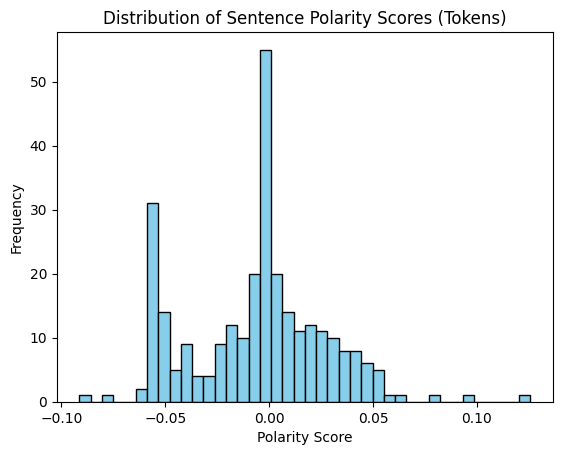

In [39]:
# Plot histogram of sentence scores
plt.hist(sentence_scores, bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Polarity Scores (Tokens)')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

# The peak of the histogram is a 0.00
# There is a smaller peak just below -0.05
# The majority of the distribution falls between -0.05 & 0.05

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### **Question 6 answer:**

In [31]:
# Load the trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Read the HTML content from the file
with open('article_content.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Get the text content of the article
article_text = soup.get_text()

# Process the text using spaCy pipeline
doc = nlp(article_text)

# Initialize a list to store sentence scores
sentence_scores = []

# Iterate over each sentence in the article
for sentence in doc.sents:
    # Initialize a list to store lemma scores for the sentence
    lemma_scores = []
    # Iterate over each token in the sentence
    for token in sentence:
        # Perform sentiment analysis on the lemma of the token
        blob = TextBlob(token.lemma_)
        # Get the polarity score of the lemma
        polarity_score = blob.sentiment.polarity
        # Append the score to the list
        lemma_scores.append(polarity_score)
    # Calculate the average score for the sentence
    if lemma_scores:
        sentence_score = sum(lemma_scores) / len(lemma_scores)
    else:
        sentence_score = 0  # Default to 0 if there are no lemmas
    # Append the average score to the list of sentence scores
    sentence_scores.append(sentence_score)

# Print the list of sentence scores with labels
print("List of Sentence Scores:")
for i, score in enumerate(sorted(sentence_scores), start=1):
    print(f"Sentence {i} Lemma score: {score}")

List of Sentence Scores:
Sentence 1 Lemma score: -0.09126984126984126
Sentence 2 Lemma score: -0.08
Sentence 3 Lemma score: -0.06153846153846154
Sentence 4 Lemma score: -0.06153846153846154
Sentence 5 Lemma score: -0.05714285714285715
Sentence 6 Lemma score: -0.05454545454545456
Sentence 7 Lemma score: -0.05333333333333334
Sentence 8 Lemma score: -0.05333333333333334
Sentence 9 Lemma score: -0.05333333333333334
Sentence 10 Lemma score: -0.05333333333333334
Sentence 11 Lemma score: -0.05333333333333334
Sentence 12 Lemma score: -0.05333333333333334
Sentence 13 Lemma score: -0.05333333333333334
Sentence 14 Lemma score: -0.05333333333333334
Sentence 15 Lemma score: -0.05333333333333334
Sentence 16 Lemma score: -0.05333333333333334
Sentence 17 Lemma score: -0.05333333333333334
Sentence 18 Lemma score: -0.05333333333333334
Sentence 19 Lemma score: -0.05333333333333334
Sentence 20 Lemma score: -0.05333333333333334
Sentence 21 Lemma score: -0.05333333333333334
Sentence 22 Lemma score: -0.05333

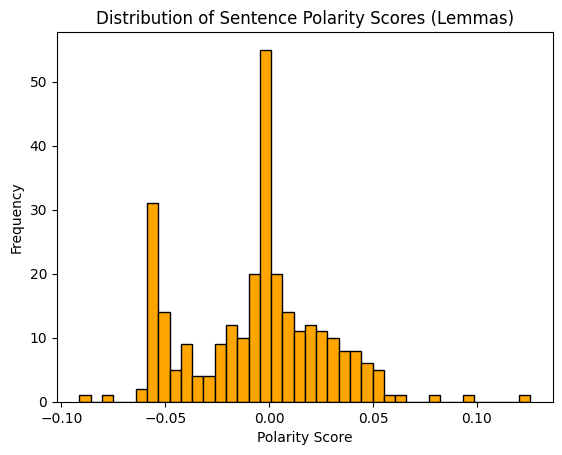

In [38]:
# Plot histogram of sentence scores
plt.hist(sentence_scores, bins=40, color='orange', edgecolor='black')
plt.title('Distribution of Sentence Polarity Scores (Lemmas)')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

# The peak of the histogram is a 0.00
# There is a smaller peak just below -0.05
# The majority of the distribution falls between -0.05 & 0.05

### **Question 7 answer:**

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): **0.03**
* Cutoff Score (lemmas): **0.03**

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

### **Question 8 answer:**

In [47]:
# Define the cutoff score for tokens
token_cutoff_score = 0.03

# Initialize an empty list to store sentences in the summary
summary_sentences = []

# Iterate through each sentence in the article
for sentence in doc.sents:
    # Initialize a list to store token scores for the sentence
    token_scores = []
    # Iterate through each token in the sentence
    for token in sentence:
        # Perform sentiment analysis on the token
        blob = TextBlob(token.text)
        # Get the polarity score of the token
        polarity_score = blob.sentiment.polarity
        # Append the score to the list
        token_scores.append(polarity_score)
    # Calculate the average score for the sentence
    if token_scores:
        sentence_score = sum(token_scores) / len(token_scores)
    else:
        sentence_score = 0  # Default to 0 if there are no tokens
    # Check if the sentence score is greater than the cutoff score
    if sentence_score > token_cutoff_score:
        # Add the sentence to the summary
        summary_sentences.append(sentence.text.strip())

# Remove excessive whitespace and make the summary text look more cohesive
summary_text = ' '.join(summary_sentences).strip()

# Replace multiple consecutive whitespace characters with a single space
summary_text = ' '.join(summary_text.split())

# Add line breaks between sentences
summary_text = summary_text.replace('. ', '.\n')

# Print the summary
print("Summary:")
print(summary_text)

Summary:
2024 NFL Draft Eric Edholm's top 100 prospects 2.0: Ranking the best players in the 2024 NFL Draft class Published: Apr 10, 2024 at 01:43 PM Eric Edholm Lead Draft Writer Copied! Top 100 prospects: 2.0 1.0 The second version of my list of the top 100 prospects in the 2024 NFL Draft includes some important updates, from pro days and from learning more about previously injured prospects who were finally able to work out.
Every team's full set of picks MHJ has stood on business and skipped most of the pre-draft process.
Senior It feels like we've almost forgotten how great a player he made himself into amid all the Harrison/Nabers talk.
He's likely to be a top-five pick for good reason: Daniels is a weapon.
He's a spectacular yards-after-the-catch playmaker even in a smallish frame.
I like Quinyon Mitchell a touch more, but Arnold's potential shines the more you watch him.
Some might argue for him to be kicked inside, but right tackle looks like a good spot to start him out at.
H

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

### **Question 9 answer:**

In [48]:
# Print the polarity score of the summary
blob_summary = TextBlob(summary_text)
polarity_summary = blob_summary.sentiment.polarity
print("Polarity Score of Summary:", polarity_summary)

# Print the number of sentences in the summarized article
num_sentences_summary = len(summary_sentences)
print("Number of Sentences in Summarized Article:", num_sentences_summary)

Polarity Score of Summary: 0.38231325863678806
Number of Sentences in Summarized Article: 49


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

### **Question 10 answer:**

In [49]:
# Define the cutoff score for lemmas
lemma_cutoff_score = 0.03

# Initialize an empty list to store sentences in the summary
summary_sentences = []

# Iterate through each sentence in the article
for sentence in doc.sents:
    # Initialize a list to store lemma scores for the sentence
    lemma_scores = []
    # Iterate through each token in the sentence
    for token in sentence:
        # Perform sentiment analysis on the lemma of the token
        blob = TextBlob(token.lemma_)
        # Get the polarity score of the lemma
        polarity_score = blob.sentiment.polarity
        # Append the score to the list
        lemma_scores.append(polarity_score)
    # Calculate the average score for the sentence
    if lemma_scores:
        sentence_score = sum(lemma_scores) / len(lemma_scores)
    else:
        sentence_score = 0  # Default to 0 if there are no tokens
    # Check if the sentence score is greater than the cutoff score
    if sentence_score > lemma_cutoff_score:
        # Add the sentence to the summary
        summary_sentences.append(sentence.text.strip())

# Generate the summary text by joining the sentences in the list
summary_text = ' '.join(summary_sentences).strip()

# Replace multiple consecutive whitespace characters with a single space
summary_text = ' '.join(summary_text.split())

# Add line breaks between sentences
summary_text = summary_text.replace('. ', '.\n')

# Print the summary
print("Summary:")
print(summary_text)

Summary:
2024 NFL Draft Eric Edholm's top 100 prospects 2.0: Top 100 prospects: 2.0 1.0 The second version of my list of the top 100 prospects in the 2024 NFL Draft includes some important updates, from pro days and from learning more about previously injured prospects who were finally able to work out.
Every team's full set of picks MHJ has stood on business and skipped most of the pre-draft process.
Senior It feels like we've almost forgotten how great a player he made himself into amid all the Harrison/Nabers talk.
He's likely to be a top-five pick for good reason: Daniels is a weapon.
He's a spectacular yards-after-the-catch playmaker even in a smallish frame.
I like Quinyon Mitchell a touch more, but Arnold's potential shines the more you watch him.
Some might argue for him to be kicked inside, but right tackle looks like a good spot to start him out at.
He really only carried Michigan on a few high-leverage drives, but NFL teams appear charmed by the possibility that his rare int

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

### **Question 11 answer:**

In [50]:
# Print the polarity score of the summary generated with lemma scores
blob_summary = TextBlob(summary_text)
polarity_summary = blob_summary.sentiment.polarity
print("Polarity Score of Summary (with lemma scores):", polarity_summary)

# Print the number of sentences in the summarized article
num_sentences_summary = len(summary_sentences)
print("Number of Sentences in Summarized Article:", num_sentences_summary)

Polarity Score of Summary (with lemma scores): 0.3754286500078579
Number of Sentences in Summarized Article: 42


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

### **Question 12 answer:**

|                      | Article Polarity Score | Token-based Summary Polarity Score | Lemma-based Summary Polarity Score |
|----------------------|------------------------|------------------------------------|------------------------------------|
| Polarity Score      |  -0.004872037908328229   |    0.38231325863678806            |         0.3754286500078579        |
| Number of Sentences |      233       |             49               |           42            |


The token and lemma summaries are closer in comparison than the overall article. They have a significantly higher polarity. This suggests that the summaries tend to convey more positive sentiment compared to the original article.

When selecting sentences for the summary, sentences with higher sentiment polarity scores may be prioritized to create a more engaging and positive summary. Sentiment analysis can be subjective and influenced by various factors.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

### **Question 13 answer:**

I would consider the lemma-based summary to be better.

It captures the essence of the original article more effectively by selecting sentences with higher sentiment polarity scores based on lemmas. Resulting in a summary that conveys a positive sentiment while retaining important information from the original article. It also has fewer sentences compared to the token-based summary.